In [1]:
# expectation maximization
import data_reader
import numpy as np
from sklearn.mixture import GaussianMixture
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

In [2]:
# required functions
def plotable_gaussian(mu, var):
    sigma = math.sqrt(var)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    return x, y

In [3]:
path2submitsA  = 'iui20_ideaSubmits.csv'
path2requestsA = 'iui20_inspirationRequests.csv'

path2submitsB  = 'iui20_ideaSubmitsPart2.csv'
path2requestsB = 'iui20_inspirationRequestsPart2.csv'

seconds_per_bucket = 30

In [4]:
#load data as sessions
sessionsA = data_reader.load_data_as_sessions_dict(path2submitsA, path2requestsA, seconds_per_bucket)
sessionsB = data_reader.load_data_as_sessions_dict(path2submitsB, path2requestsB, seconds_per_bucket)
sessions = {**sessionsA, **sessionsB}
#sessions = sessionsA

nr_of_bucketsA = len(sessionsA[list(sessionsA.keys())[0]]['requests'])
nr_of_bucketsB = len(sessionsB[list(sessionsB.keys())[0]]['requests'])
nr_of_buckets  = min(nr_of_bucketsA, nr_of_bucketsB)

In [5]:
requestsA = np.array([sessionsA[worker_id]['requests'][:nr_of_buckets] for worker_id in sessionsA.keys()])
requestsB = np.array([sessionsB[worker_id]['requests'][:nr_of_buckets] for worker_id in sessionsB.keys()])
requests  = np.array([sessions [worker_id]['requests'][:nr_of_buckets] for worker_id in sessions.keys()])
sum_requestsA = np.sum(requestsA, axis=1)
sum_requestsB = np.sum(requestsB, axis=1)
sum_requests  = np.sum(requests,  axis=1)

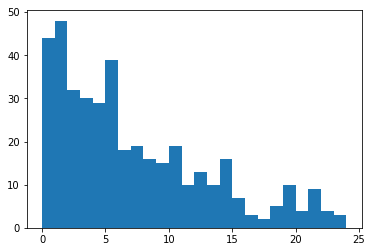

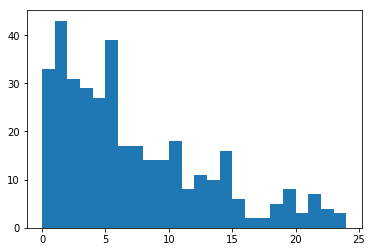

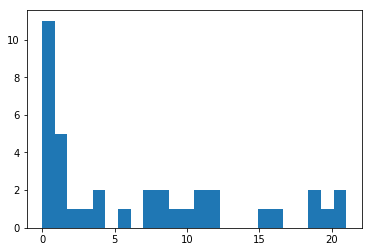

In [6]:
sum_requestsA = [a for a in sum_requestsA if a<25]
sum_requestsB = [a for a in sum_requestsB if a<25]
sum_requests  = [a for a in sum_requests  if a<25]

plt.hist(sum_requests, bins=24)
#plt.axvline(x=np.mean(sum_requests), color='red')
plt.show()
plt.hist(sum_requestsA, bins=24)
#plt.axvline(x=np.mean(sum_requests), color='red')
plt.show()
plt.hist(sum_requestsB, bins=24)
#plt.axvline(x=np.mean(sum_requests), color='red')
plt.show()

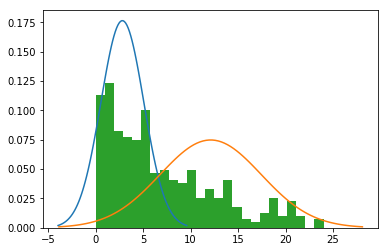

In [11]:
# fit the data with two gaussians - avoiders seekers
gm = GaussianMixture(2)
gm.fit([[a] for a in sum_requests])
# predict the probabilities of difference requests amounts
y = gm.predict_proba([[i] for i in range(25)]).astype(np.float64)

# recreate proba distributions for avoiders seekers
mus  = [a[0] for a in gm.means_]
vars = [a[0,0] for a in gm.covariances_]
# plot them
for i in range(len(mus)):
    g_x, g_y = plotable_gaussian(mus[i], vars[i])
    plt.plot(g_x, g_y)
plt.hist(sum_requests, density=True, bins=25)
plt.show()

In [8]:
# find cutoff for avoiders, unknown, seekers
# predict for all in session and find amounts of unknowns?
# use to define the target